In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
lowerbound=df['Performance Index'].quantile(0.25)
upperbound=df['Performance Index'].quantile(0.75)
iqr=upperbound-lowerbound
lowerbound=lowerbound-(1.5*iqr)
upperbound=upperbound+(1.5*iqr)
df=df[(df['Performance Index']>=lowerbound) & (df['Performance Index']<=upperbound)]


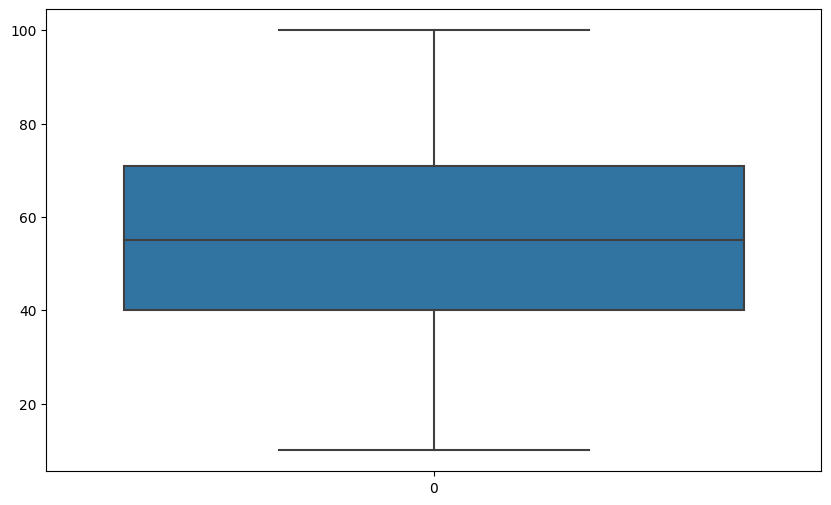

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Performance Index'])
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])



In [15]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Performance Index',axis=1),df['Performance Index'],test_size=0.2,random_state=42)

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y=model.predict(x_test)

In [18]:
mse = mean_squared_error(y_test, y)
r2 = r2_score(y_test, y)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.082628398521853
R-squared: 0.9889832909573145


In [21]:
print(f"""Train Score : {model.score(x_train,y_train) * 100:.2f}%""")
print(f"""Test Score : {model.score(x_test,y_test) * 100:.2f}%""")

Train Score : 98.87%
Test Score : 98.90%


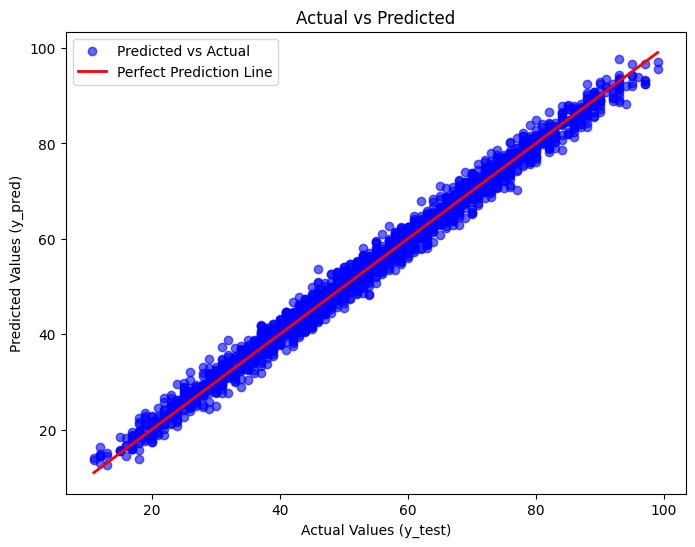

In [19]:

y_pred = model.predict(x_test)

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction Line")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
